In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# To predict Brain Stroke in Early Stage to treat patient on time.

In [2]:
dataset=pd.read_csv(r"C:\Datasets\Brain Stroke.csv")
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


# GENDER

<AxesSubplot:>

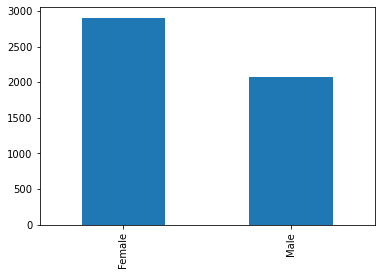

In [7]:
dataset['gender'].value_counts().plot(kind='bar')

In [8]:
pd.crosstab(dataset['stroke'],dataset['gender']) # here 4.81% of females & 5.20% of males have Stroke.

gender,Female,Male
stroke,,
0,2767,1966
1,140,108


# AGE

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

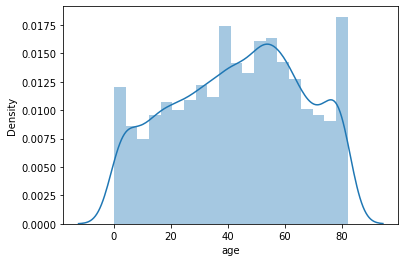

In [9]:
sns.distplot(dataset['age'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

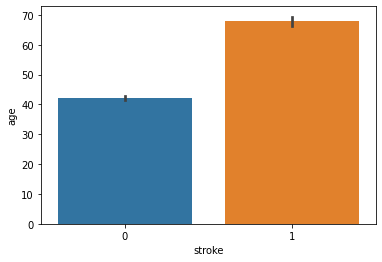

In [10]:
sns.barplot(x='stroke',y='age',data=dataset) # who are olders have stroke.

# Hypertension

In [11]:
pd.crosstab(dataset['stroke'],dataset['hypertension']) # 13.78% hypertension having stroke. 4% No hypertension having stroke.

hypertension,0,1
stroke,,
0,4320,413
1,182,66


<AxesSubplot:>

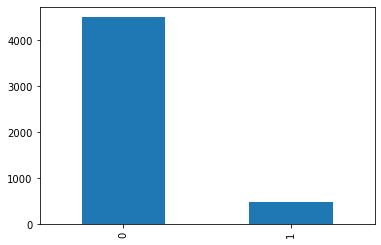

In [12]:
dataset['hypertension'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='stroke', ylabel='count'>

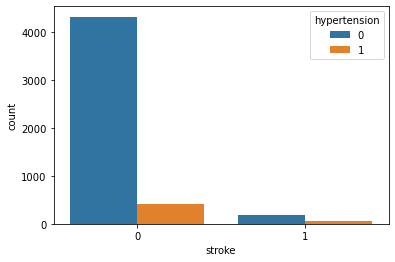

In [13]:
sns.countplot(x='stroke',hue='hypertension',data=dataset)

# heart desease

<AxesSubplot:>

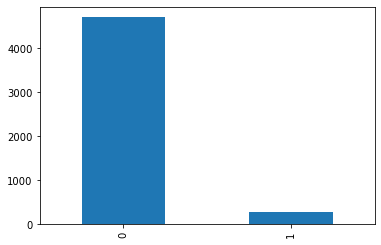

In [14]:
dataset['heart_disease'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='stroke', ylabel='count'>

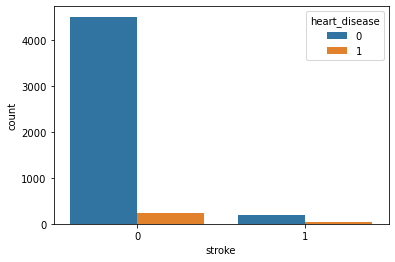

In [15]:
sns.countplot(x='stroke',hue='heart_disease',data=dataset)

In [16]:
pd.crosstab(dataset['stroke'],dataset['heart_disease']) # Those who have heartdesease 17% of them havin stroke. Those who don't have heartdesease 4% of them have stroke.

heart_disease,0,1
stroke,,
0,4505,228
1,201,47


# Ever Married 

In [17]:
dataset['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [18]:
pd.crosstab(dataset['stroke'],dataset['ever_married']) # 6% married having stroke. 1% unmarried having stroke.

ever_married,No,Yes
stroke,,
0,1672,3061
1,29,219


<AxesSubplot:xlabel='stroke', ylabel='count'>

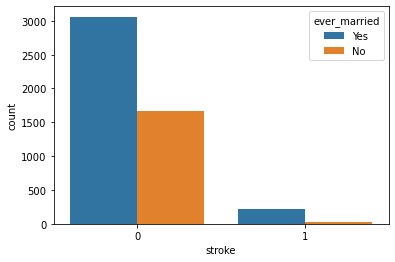

In [19]:
sns.countplot(x='stroke',hue='ever_married',data=dataset)

# Work Type

<AxesSubplot:>

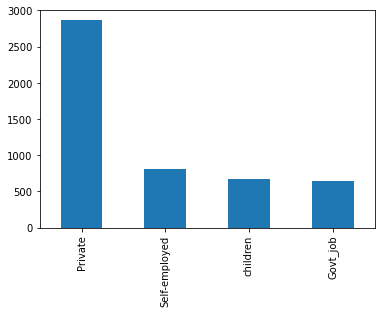

In [20]:
dataset['work_type'].value_counts().plot(kind='bar')

In [21]:
pd.crosstab(dataset['stroke'],dataset['work_type']) # 5% private, 5% govt, 8% self-employed having stroke.0.2% of childrens have stroke.

work_type,Govt_job,Private,Self-employed,children
stroke,,,,
0,611,2712,739,671
1,33,148,65,2


<AxesSubplot:xlabel='stroke', ylabel='count'>

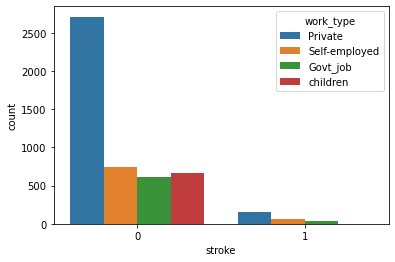

In [22]:
sns.countplot(x='stroke',hue='work_type',data=dataset)

# Residency_type

In [23]:
dataset['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [24]:
q=(113/2449)*100
print(q)

4.614128215598203


In [25]:
pd.crosstab(dataset['stroke'],dataset['Residence_type']) # 5% of urban have stroke & 4.61% of rural have stroke.

Residence_type,Rural,Urban
stroke,,
0,2336,2397
1,113,135


<AxesSubplot:xlabel='stroke', ylabel='count'>

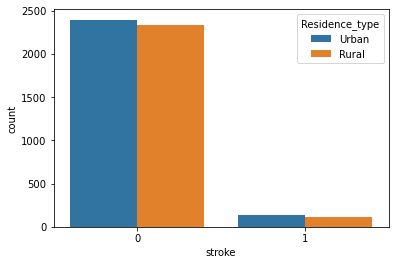

In [26]:
sns.countplot(x='stroke',hue='Residence_type',data=dataset)

# Avg Glucose Level

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

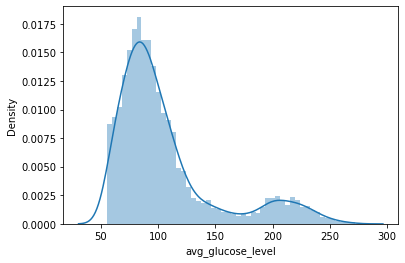

In [27]:
sns.distplot(dataset['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

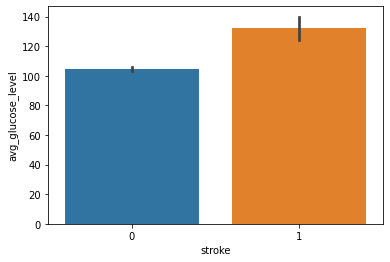

In [28]:
sns.barplot(x='stroke',y='avg_glucose_level',data=dataset) # having high glucose level increases chance of stroke.

# BMI

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

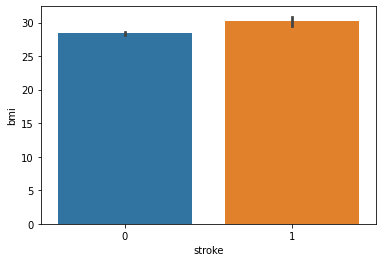

In [29]:
sns.barplot(x='stroke',y='bmi',data=dataset) # here, we can see that bmi does not produce much information.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

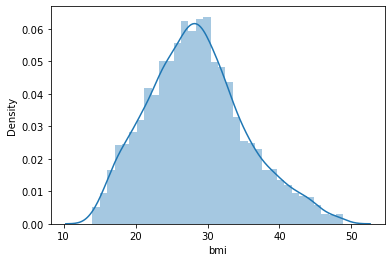

In [30]:
sns.distplot(dataset['bmi'])

#  smoking_status

<AxesSubplot:>

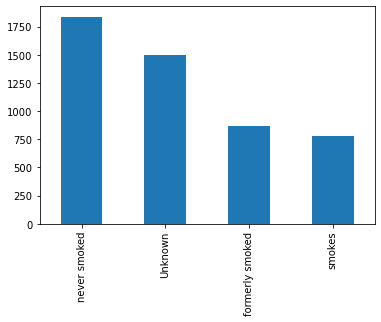

In [31]:
dataset['smoking_status'].value_counts().plot(kind='bar')

In [32]:
pd.crosstab(dataset['stroke'],dataset['smoking_status']) # 5% never,3% Unknown,8% fairely smoked,5.41% smokes having stroke.

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1453,797,1749,734
1,47,70,89,42


<AxesSubplot:xlabel='stroke', ylabel='count'>

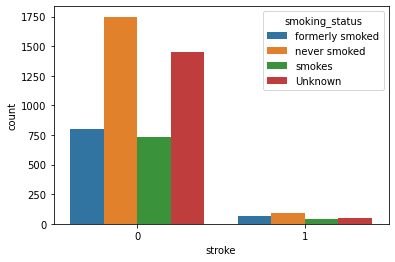

In [33]:
sns.countplot(x='stroke',hue='smoking_status',data=dataset) # who smokes little or more 13.41% of them having stroke.

# Labelling

In [34]:
l1=LabelEncoder()
dataset["gender"]=l1.fit_transform(dataset["gender"])
dataset["ever_married"]=l1.fit_transform(dataset["ever_married"])
dataset["work_type"]=l1.fit_transform(dataset["work_type"])
dataset["Residence_type"]=l1.fit_transform(dataset["Residence_type"])
dataset["smoking_status"]=l1.fit_transform(dataset["smoking_status"])

In [35]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


# Corr

<AxesSubplot:>

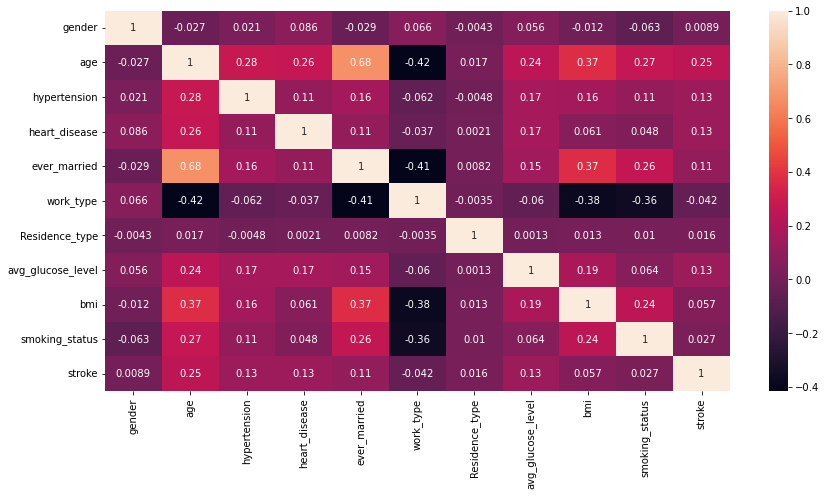

In [36]:
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(),annot=True)

In [37]:
del dataset["gender"]

In [38]:
del dataset["bmi"]

In [39]:
del dataset['Residence_type']

# Splitting Data

In [40]:
dataset

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,1,1,228.69,1,1
1,80.0,0,1,1,1,105.92,2,1
2,49.0,0,0,1,1,171.23,3,1
3,79.0,1,0,1,2,174.12,2,1
4,81.0,0,0,1,1,186.21,1,1
...,...,...,...,...,...,...,...,...
4976,41.0,0,0,0,1,70.15,1,0
4977,40.0,0,0,1,1,191.15,3,0
4978,45.0,1,0,1,0,95.02,3,0
4979,40.0,0,0,1,1,83.94,3,0


In [41]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
ever_married,4981.0,0.658502,0.474260,0.00,0.00,1.00,1.00,1.00
work_type,4981.0,1.302349,0.860170,0.00,1.00,1.00,2.00,3.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
smoking_status,4981.0,1.379442,1.072180,0.00,0.00,2.00,2.00,3.00
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [42]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [43]:
print(Counter(y))

Counter({0: 4733, 1: 248})


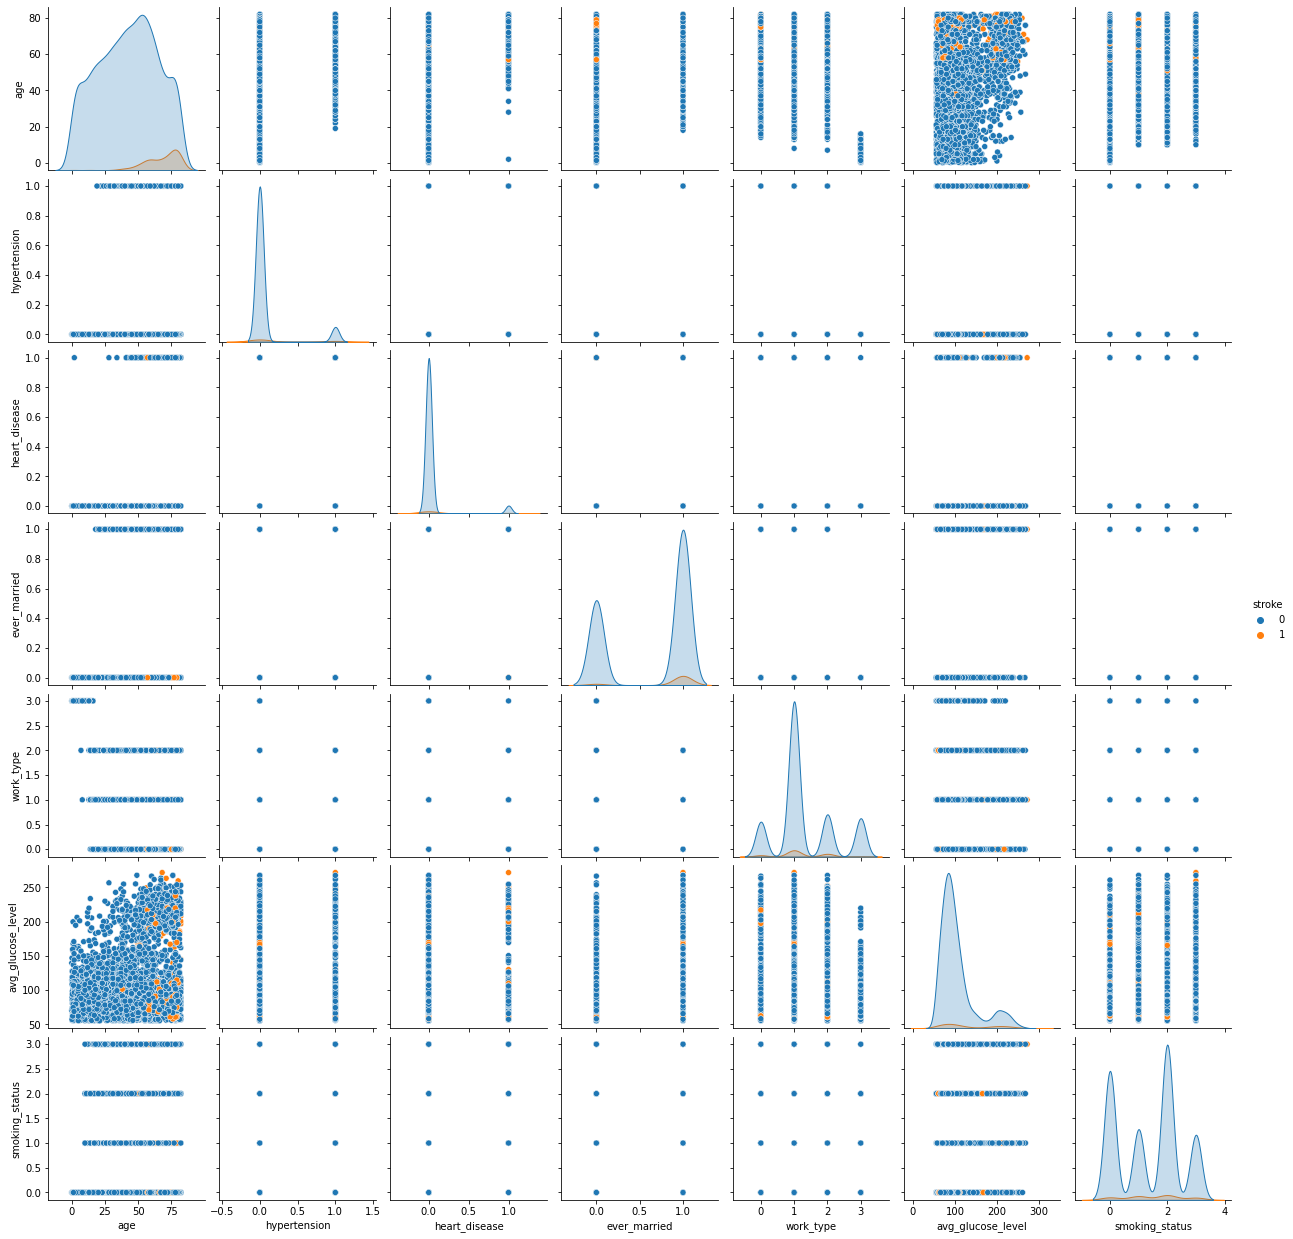

In [44]:
sns.pairplot(dataset,hue='stroke')

In [45]:
scaler=StandardScaler()

# Balancing Data

In [46]:
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


# Train & Test Data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=7)
print(Counter(y_test))

Counter({0: 961, 1: 933})


In [48]:
x_train_scaled=scaler.fit_transform(x_train)

In [49]:
x_test_scaled=scaler.transform(x_test)

# Model fitting

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.svm import SVC

In [52]:
s=SVC()

In [53]:
# C = np.arange(1,10,1)
# gamma = [0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]

In [54]:
# grid = dict(C=C,gamma=gamma)

In [55]:
# from sklearn.model_selection import StratifiedKFold

In [56]:
# cv=StratifiedKFold(n_splits=10)

In [57]:
# grid_search=GridSearchCV(estimator=s,param_grid=grid,cv=cv,scoring='f1',n_jobs=-1,verbose=1)

In [58]:
# grid_result=grid_search.fit(x_train_scaled,y_train)

In [59]:
# grid_result.best_params_

In [60]:
# from sklearn.ensemble import RandomForestClassifier

In [61]:
s=SVC(C=9,gamma=5)
s.fit(x_train_scaled,y_train)
s_pred=s.predict(x_test_scaled)
print(accuracy_score(y_test,s_pred)*100)

92.60823653643084


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt=DecisionTreeClassifier()

In [75]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_sample_split=range(1,10)
min_sample_leaf=range(1,5)

In [73]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid=dict(criterion=criterion,max_depth=max_depth,min_samples_split=min_sample_split,min_samples_leaf=min_sample_leaf)

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
skf=StratifiedKFold(n_splits=10,shuffle=True)

In [79]:
dt_grid=GridSearchCV(estimator=dt,param_grid=grid,scoring='f1',cv=skf,verbose=1)

In [80]:
dt_result=dt_grid.fit(x_train_scaled,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C

In [82]:
best_param=dt_grid.best_params_

In [83]:
dt=DecisionTreeClassifier(**best_param)

In [84]:
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=7)

In [85]:
d_pred=dt.predict(x_test_scaled)

In [86]:
print(accuracy_score(y_test,d_pred)*100)

92.6610348468849
